## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing data

In [ ]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\MLE PROJECTS\REGRESSION\MLE_PROJECT_1(on_regression)\Advertising.csv")
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Data Cleaning

## Empty cells

In [4]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plotting Boxplot

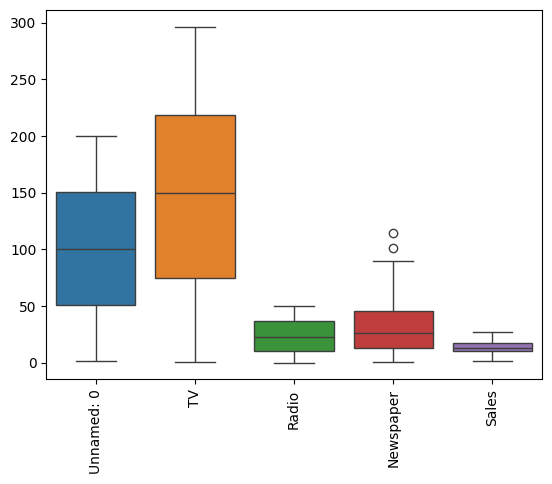

In [6]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [7]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


## Extract Dependent and Independent Variables

In [8]:
X = encoded_data.iloc[:,0:4]   #Independent variable
y = encoded_data['Sales']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [9]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


            Unnamed: 0     TV  Radio  Newspaper  Sales
Unnamed: 0       1.000  0.018 -0.111     -0.155 -0.052
TV               0.018  1.000  0.055      0.057  0.782
Radio           -0.111  0.055  1.000      0.354  0.576
Newspaper       -0.155  0.057  0.354      1.000  0.228
Sales           -0.052  0.782  0.576      0.228  1.000


<Axes: >

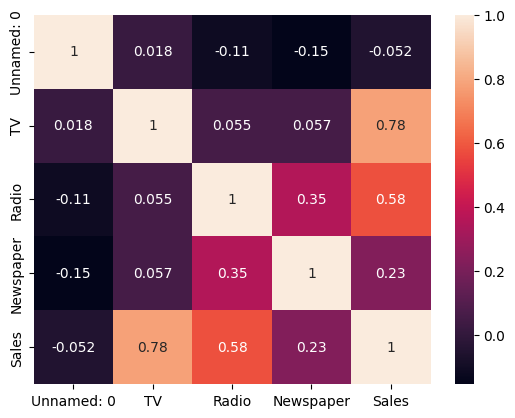

In [10]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set result
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual  Predicted
95     16.9  16.412277
15     22.4  20.843193
30     21.4  21.511869
158     7.3  10.653100
128    24.7  22.124058
115    12.6  13.123835
69     22.3  21.037489
170     8.4   7.503854
174    11.5  13.647870
45     14.9  15.120409
66      9.5   9.020556
182     8.7   6.706666
165    11.9  14.401551
78      5.3   8.886090
186    10.3   9.743533
177    11.7  12.215520
56      5.5   8.713709
152    16.6  16.294145
82     11.3  10.268023
68     18.9  18.804982
124    19.7  19.588647
16     12.5  13.223183
148    10.9  12.364787
93     22.2  21.314736
65      9.3   7.797347
60      8.1   5.781900
84     21.7  20.749348
67     13.4  11.954767
125    10.6   9.199109
132     5.7   8.521787
9      10.6  12.404313
18     11.3   9.948652
55     23.7  21.368803
75      8.7  12.253748
150    16.1  18.299435
104    20.7  20.133474
135    11.6  14.074646
137    20.8  20.885947
164    11.9  11.052150
76      6.9   4.551687


In [13]:
# predicting the accuracy score
score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  89.8648915141708 %


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
# Prediction on the dataset
y_predict1 = lr.predict(X_test)

y_predict3 = gb.predict(X_test)
y_predict4 = xgb.predict(X_test)
# Evaluating
from sklearn import metrics
scorelr = metrics.r2_score(y_test,y_predict1)

scoregb = metrics.r2_score(y_test,y_predict3)
scorexgb = metrics.r2_score(y_test,y_predict4)
print(scorelr,scoregb,scorexgb)

0.898648915141708 0.9844132885545132 0.9724646299340373


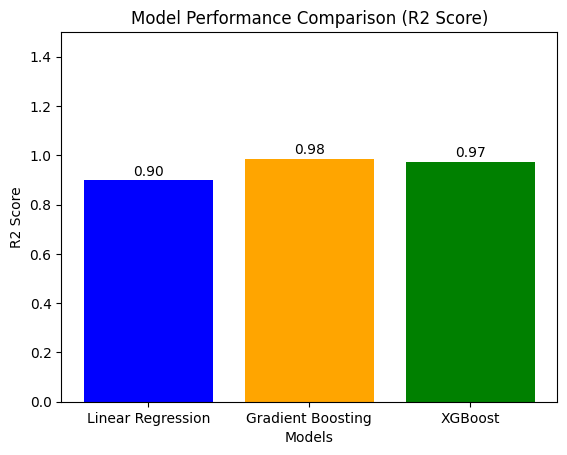

In [21]:
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost']
scores = [scorelr, scoregb, scorexgb]
plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1.5)
plt.title('Model Performance Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.xlabel('Models')
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center')
plt.show()

## From this graph we can says that Gradient boosting models performs the perfect accuracy score